In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
# Load, explore and plot data
import seaborn as sns
import matplotlib.pyplot as plt
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
# Modeling
from tensorflow.keras.layers import GRU, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
import transformers


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

df = df[['v1','v2']]
df['v1'].replace({'ham':0, 'spam':1},inplace=True)
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [3]:

# Paso 1: Tokenización
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(df['v2'])

# Convertir textos a secuencias numéricas
sequences = tokenizer.texts_to_sequences(df['v2'])

# Paso 2: Padding
max_len = max(len(seq) for seq in sequences)
X = pad_sequences(sequences, maxlen=max_len, padding='post')

# Paso 3: Creación de los Conjuntos de Entrenamiento y Prueba
X_train, X_test, y_train, y_test = train_test_split(X, df['v1'], test_size=0.2, random_state=434)


In [85]:
#Crear Modelo
model = Sequential()
model.add(Embedding(500, X_train.shape[1], input_length = 162))
model.add(GlobalAveragePooling1D())
model.add(Dense(540, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
140/140 [==============================] - 1s 4ms/step - loss: 0.4001 - accuracy: 0.8602 - val_loss: 0.3259 - val_accuracy: 0.8771
Epoch 2/30
140/140 [==============================] - 0s 3ms/step - loss: 0.2330 - accuracy: 0.8999 - val_loss: 0.1171 - val_accuracy: 0.9578
Epoch 3/30
140/140 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.9780 - val_loss: 0.0806 - val_accuracy: 0.9740
Epoch 4/30
140/140 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9843 - val_loss: 0.0803 - val_accuracy: 0.9767
Epoch 5/30
140/140 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9883 - val_loss: 0.0745 - val_accuracy: 0.9785
Epoch 6/30
140/140 [==============================] - 1s 4ms/step - loss: 0.0440 - accuracy: 0.9868 - val_loss: 0.0766 - val_accuracy: 0.9767
Epoch 7/30
140/140 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9892 - val_loss: 0.0751 - val_accuracy: 0.9794
Epoch 

In [73]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = list(np.concatenate(model.predict(X_test) > 0.5).astype(int))
y_test = list(y_test)

report = classification_report(y_test, y_pred)
print(report)

35/35 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       978
           1       0.96      0.88      0.92       137

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



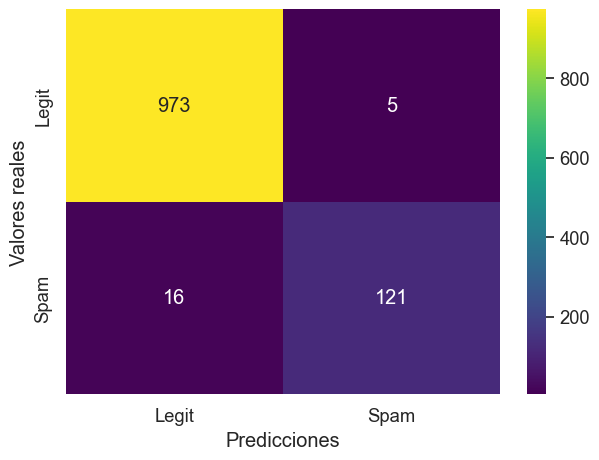

In [74]:
confusion = confusion_matrix(y_test, y_pred)
class_labels = ["Legit", "Spam"]

plt.figure(figsize=(7, 5)) 
sns.heatmap(confusion, annot=True,fmt='d', cmap="viridis", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')

plt.show()